<a href="https://colab.research.google.com/github/JanithaB/Gen_AI/blob/main/Gen_AI_gif_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install torch

In [ ]:
%%capture
!pip install diffusers
!pip install huggingface_hub
!pip install safetorch

In [ ]:
import torch
from diffusers import AnimateDiffPipeline, MotionAdapter, EulerDiscreteScheduler
from diffusers.utils import export_to_gif
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
device = "cuda"
dtype = torch.float16

In [ ]:
step = 8  # Options: [1,2,4,8]
repo = "ByteDance/AnimateDiff-Lightning"
ckpt = f"animatediff_lightning_{step}step_diffusers.safetensors"
base = "emilianJR/epiCRealism"  # Choose to your favorite base model.

In [ ]:
%%capture
adapter = MotionAdapter().to(device, dtype)
adapter.load_state_dict(load_file(hf_hub_download(repo ,ckpt), device=device))
pipe = AnimateDiffPipeline.from_pretrained(base, motion_adapter=adapter, torch_dtype=dtype).to(device)
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing", beta_schedule="linear")


  0%|          | 0/8 [00:00<?, ?it/s]

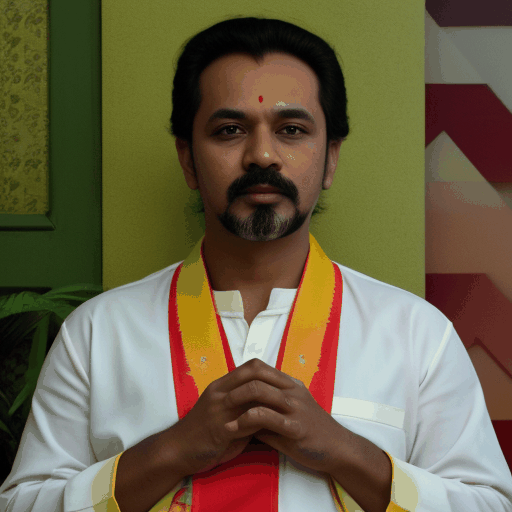

In [ ]:
from IPython.display import Image
output = pipe(prompt="Sri lanka", guidance_scale=1.0, num_inference_steps=step)
export_to_gif(output.frames[0], "animation.gif")
Image(filename='animation.gif')